## Custos Operacionais B3 - Mini ínidice

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# Cálculo de emolumentos e taxa de registro

def emolumentos(adv):
    
    upper_bounds = [50,150,500,1500,3500,7500,15000]
    preco = [0.63,0.58,0.54,0.49,0.44,0.39,0.36,0.32]
    
    p_medio = min([adv,upper_bounds[0]])*preco[0]
    for i in range(1,len(upper_bounds)):
        p_medio += max([min([adv,upper_bounds[i]])-upper_bounds[i-1],0])*preco[i]
        
    p_medio += max([adv-upper_bounds[-1],0])*preco[-1]
    
    return p_medio / adv * 0.21
    
def tx_registro(adv):
    
    upper_bounds = [50,150,500,1500,3500,7500,15000]
    preco = [1.22,1.12,1.06,0.96,0.86,0.76,0.69,0.63]
    
    p_medio = min([adv,upper_bounds[0]])*preco[0]
    for i in range(1,len(upper_bounds)):
        p_medio += max([min([adv,upper_bounds[i]])-upper_bounds[i-1],0])*preco[i]
    p_medio += max([adv-upper_bounds[-1],0])*preco[-1]
    
    return p_medio / adv * 0.21

tx_liq = 0.30

def incentivo(adv):
    upper_bound = [5,50,150,1500]
    desconto = [0.35,0.40,0.55,0.70,0.75]
    
    desc = desconto[0]
    for i in range(len(upper_bound)):
        if (adv > upper_bound[i]):
            desc = desconto[i+1]
            
    return desc

def custo(n_contratos):
    adv = n_contratos / 5
    return (emolumentos(adv)+tx_registro(adv))*(1-incentivo(adv))+tx_liq

def emolumentos_hft(adv):
    upper_bounds = [1800,8500,15000,25000,40000,60000,80000,100000,125000]
    preco = [0.703,0.053,0.041,0.040,0.038,0.037,0.037,0.036,0.035,0.034]
    
    p_medio = min([adv,upper_bounds[0]])*preco[0]
    for i in range(1,len(upper_bounds)):
        p_medio += max([min([adv,upper_bounds[i]])-upper_bounds[i-1],0])*preco[i]
        
    p_medio += max([adv-upper_bounds[-1],0])*preco[-1]
    
    return p_medio / adv * 0.21
    
def tx_registro_hft(adv,apuracao='diaria'):
    upper_bounds = [1800,8500,15000,25000,40000,60000,80000,100000,125000]
    preco = [1.147,0.087,0.067,0.064,0.062,0.061,0.059,0.058,0.057,0.056]
    
    if apuracao == 'diaria':
        return preco[sum(i <= adv for i in upper_bounds)] * 0.21
    
    p_medio = min([adv,upper_bounds[0]])*preco[0]
    for i in range(1,len(upper_bounds)):
        p_medio += max([min([adv,upper_bounds[i]])-upper_bounds[i-1],0])*preco[i]
        
    p_medio += max([adv-upper_bounds[-1],0])*preco[-1]
    
    return p_medio / adv * 0.21

def custo_hft(n_contratos):
    adv = n_contratos / 5
    return emolumentos_hft(adv)+tx_registro_hft(adv)

custo_v = np.vectorize(custo)
custo_hft_v = np.vectorize(custo_hft)

In [11]:
ADV = 20000
i = ADV / 5
print(emolumentos(i))
print(emolumentos_hft(i))
print(tx_registro(i))
print(incentivo(i))
print(tx_liq)
print(custo(5000))

0.09678374999999999
0.07255499999999998
0.18921
0.75
0.3
0.3974925


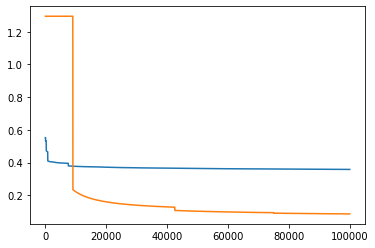

In [18]:
ADV = 20000

x = np.arange(1,ADV*5,1)


y = custo_v(x)
y_hft = custo_hft_v(x)
plt.plot(x,y,x,y_hft)
plt.show()

In [30]:


def break_even(custo,pontos_gain,pontos_loss):
    valor_ponto = 0.20
    be = (pontos_gain * valor_ponto + custo)/(valor_ponto * (pontos_gain + pontos_loss))
    return be

v_break_even = np.vectorize(break_even)
    

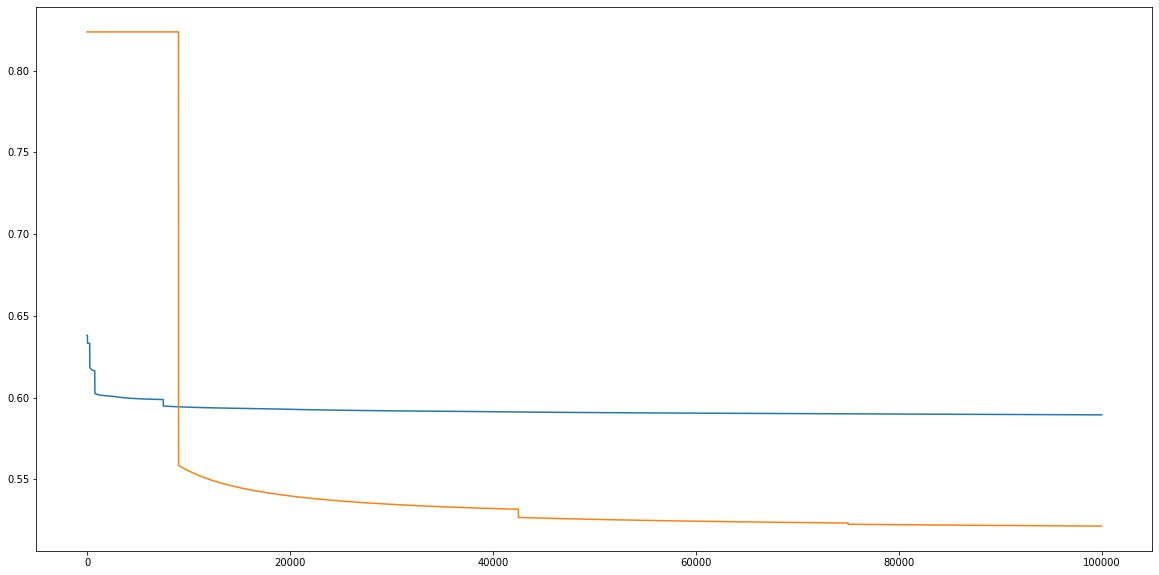

In [55]:
ADV = 100000

x = np.arange(1,ADV,1)

pontos = 10

y = v_break_even(custo_v(x),pontos,pontos)
y_hft = v_break_even(custo_hft_v(x),pontos,pontos)
plt.figure(figsize=(20,10))
plt.plot(x,y,x,y_hft)

plt.show()

In [59]:
def expected_gains(custo,ADV,acerto,pontos_gain,pontos_loss):
    valor_ponto = 0.20
    eg = acerto * (ADV * (pontos_gain*valor_ponto - custo)) - (1 - acerto) * (ADV *(pontos_loss * valor_ponto + custo))
    return eg
    
expected_gains_v = np.vectorize(expected_gains)

2232.6119999999974
4476.929399999997


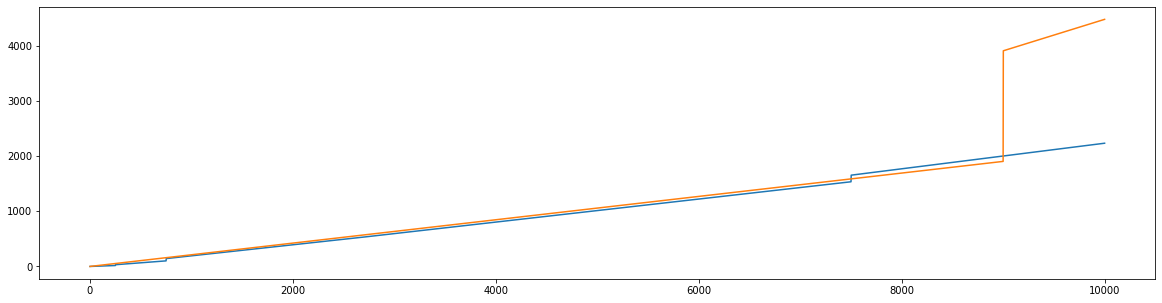

In [99]:
ADV = 10000

x = np.arange(1,ADV,1)

pontos = 15
acerto = .60

y = expected_gains_v(custo_v(x),x,acerto,pontos,pontos)
y_hft = expected_gains_v(custo_hft_v(x),x,acerto,pontos,pontos)

print(max(y))

print(max(y_hft))

plt.figure(figsize=(20,5))
plt.plot(x,y,x,y_hft)

plt.show()